In [14]:
import tensorflow as tf # Import tensorflow libraryimport matplotlib.pyplot as plt # data visualization library
from matplotlib import pyplot
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data

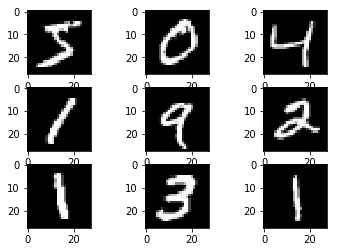

In [4]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [5]:
# Normalize the train dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
# Normalize the test dataset
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [33]:
hiddenunits=np.array([1,2,3,4,5,10,20,30,40,50,100,150,200])

In [34]:
hiddenunits

array([  1,   2,   3,   4,   5,  10,  20,  30,  40,  50, 100, 150, 200])

In [35]:
for i in range(len(hiddenunits)):
    print(hiddenunits[i])

1
2
3
4
5
10
20
30
40
50
100
150
200


0.4341166615486145
0.7110166549682617
0.8361999988555908
0.8774333596229553
0.913016676902771
0.9619166851043701
0.9894333481788635
0.9998499751091003
0.9995166659355164
1.0
1.0
1.0
0.999916672706604


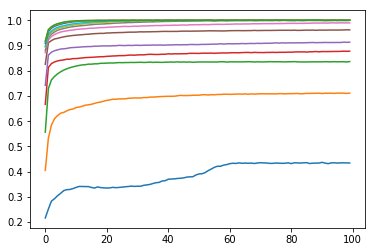

In [38]:
overallaccuracy=[]
for i in range(len(hiddenunits)):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(hiddenunits[i], activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history=model.fit(x=x_train, y=y_train, epochs=100, verbose=0) # Start training process
    plt.plot(history.history['accuracy'])
    z=history.history['accuracy'][99]
    overallaccuracy.append(z)
    print(z)

In [26]:
z=history.history['accuracy'][99]
z

0.3155333399772644

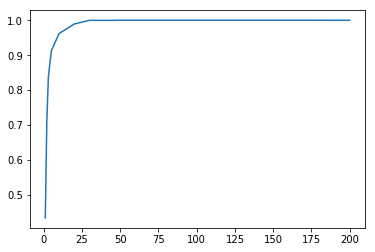

In [39]:
plt.plot(hiddenunits,overallaccuracy)

In [27]:
# Build the model object (FINISH ME)
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [28]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [29]:
model.fit(x=x_train, y=y_train, epochs=5) # Start training process

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2787 - accuracy: 0.9192
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1135 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0773 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0578 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0431 - accuracy: 0.9862


In [30]:
predictions = model.predict([x_test]) # Make prediction

Consider rewriting this model with the Functional API.


In [31]:
predictions

array([[6.1501835e-09, 1.9707819e-08, 1.0150446e-06, ..., 9.9999821e-01,
        1.4272403e-09, 7.9277378e-08],
       [1.3644863e-11, 5.2676303e-05, 9.9994683e-01, ..., 2.1381154e-10,
        1.1544117e-08, 8.9483260e-17],
       [4.0782191e-09, 9.9998343e-01, 2.2789061e-06, ..., 1.0119236e-05,
        2.4007186e-06, 6.8071682e-09],
       ...,
       [6.5160974e-11, 1.2553825e-07, 9.1358027e-10, ..., 1.2936107e-05,
        2.6040328e-07, 2.1704196e-04],
       [1.2051643e-07, 6.7584125e-08, 3.9650864e-08, ..., 1.8306429e-06,
        1.5498841e-02, 2.6437112e-08],
       [2.6497318e-07, 9.2503288e-10, 3.6650503e-09, ..., 5.1119498e-13,
        2.0834332e-09, 6.3393159e-11]], dtype=float32)

In [32]:
labels = np.argmax(predictions, axis=-1)    

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, labels)

array([[ 970,    0,    1,    2,    0,    0,    2,    0,    2,    3],
       [   0, 1123,    3,    0,    0,    0,    5,    0,    4,    0],
       [   5,    0, 1008,    4,    3,    0,    2,    6,    4,    0],
       [   0,    1,    7,  982,    2,    7,    0,    6,    2,    3],
       [   0,    1,    4,    0,  954,    0,    3,    6,    2,   12],
       [   3,    0,    0,   13,    0,  859,    7,    1,    6,    3],
       [   7,    2,    0,    1,    3,    4,  939,    1,    1,    0],
       [   2,    5,    9,    5,    0,    0,    0, 1005,    1,    1],
       [   3,    1,    5,    5,    4,    2,    3,    5,  943,    3],
       [   2,    5,    0,    6,    7,    1,    1,    5,    6,  976]])

In [34]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels)

0.9759

In [14]:
print(np.argmax(predictions[1000])) # Print out the number

9


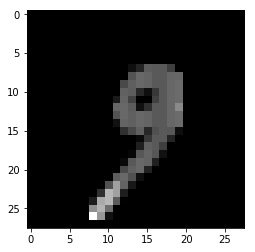

In [18]:
pyplot.imshow(x_test[1000], cmap="gray") # Import the image
pyplot.show() # Show the image